In [34]:
import numpy as np
import pandas as pd
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

In [2]:
x=np.array([2,1])
np.linalg.norm(x)

2.23606797749979

In [3]:
a=np.array([1,1])
b=np.array([-1,1])
a@b

0

In [4]:
#추천시스템(CF 기반)
#CF: 유사도 기반 평점 예측, 영화 추천, 음악 추천....등에 활용됨
#사용자 기반/ 아이템 기반 CF
#아이템 기반: 사용자 정보 부족, 여러 트랜잭션에서 중복 아이템이 적은 경우 

#홍길동(트랜잭션):A, B(아이템)
#임꺽정:C,D
#이순신:E,F


In [5]:
critics={
    'BTS':{'암수살인':5, '바울':4, '할로윈':1.5},
    '손흥민':{'바울':5, '할로윈':2},
    '조용필':{'암수살인':2.5, '바울':2, '할로윈':1},
    '나훈아':{'암수살인':3.5, '바울':4, '할로윈':5}
}

In [6]:
print(critics.get('BTS'))

{'암수살인': 5, '바울': 4, '할로윈': 1.5}


In [14]:
import math
def sim(i,j):
    return math.sqrt(pow(i,2)+pow(j,2))

In [21]:
for i in critics:
    if i!='손흥민':
        var1=critics['손흥민']['바울']-critics[i]['바울']
        var2=critics['손흥민']['할로윈']-critics[i]['할로윈']
        sim(var1, var2)
        print(i, ": ",1/(1+ sim(var1, var2)))

BTS :  0.4721359549995794
조용필 :  0.2402530733520421
나훈아 :  0.2402530733520421


In [25]:
def sim_distance(data, user1, user2):
    #유클리디안 기반 거리 (같은 영화 본건에 대한)
    rsum=0
    for i in data[user1]:
        if i!= data[user1]:
            rsum+=pow(data[user1][i]-data[user2][i],2)
    return 1/(1+math.sqrt(rsum))
# print(sim_distance(critics, '손흥민','BTS'))
            
            
    

0.4721359549995794


In [26]:
#인원에 상관없이 정렬 -> 가장 유사한 상위 n명을 추출하는 기능

# top_mathch(영화평점 딕셔너리, 기준사람(손흥민), 상위 n명, 적용함수)



In [27]:
def top_match(data, name, n=2, sim_f=sim_distance):
    #구현
    myList=[]
    for i in data:
        if i!= name:
            myList.append((sim_f(data,name,i),i))
    myList.sort()
    myList.reverse()
    return myList[:n]
top_match(critics, '손흥민')
            
    

[(0.4721359549995794, 'BTS'), (0.2402530733520421, '조용필')]

In [28]:

critics = {
    '조용필': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '강감찬': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '사랑과전쟁': 3.5,
    },
    '을지문덕': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '김유신': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '유성룡': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '이황': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '이이': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0},
}

In [30]:
import matplotlib.pyplot as plt


Text(1, 1, '사과')

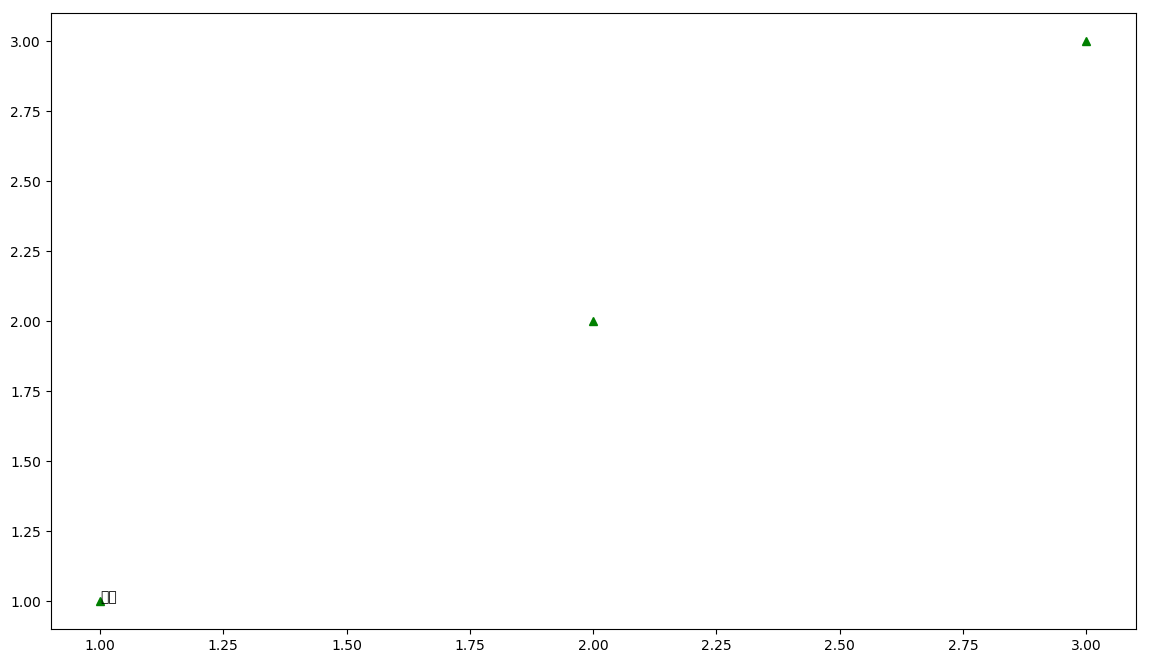

In [35]:
plt.figure(figsize=(14,8))
plt.plot([1,2,3], [1,2,3], 'g^')
plt.text(1,1,'사과')

In [36]:
def drawGraph(data, name1, name2):
    li1=[]
    li2=[]
    plt.figure(figsize=(14,8))
    for i in data[name1]:
        if i in data[name2]:
            li1.append(data[name1][i])
            li2.append(data[name2][i])
            plt.text(data[name1][i],data[name2][i],i)
    plt.xlabel(name1)
    plt.ylabel(name2)

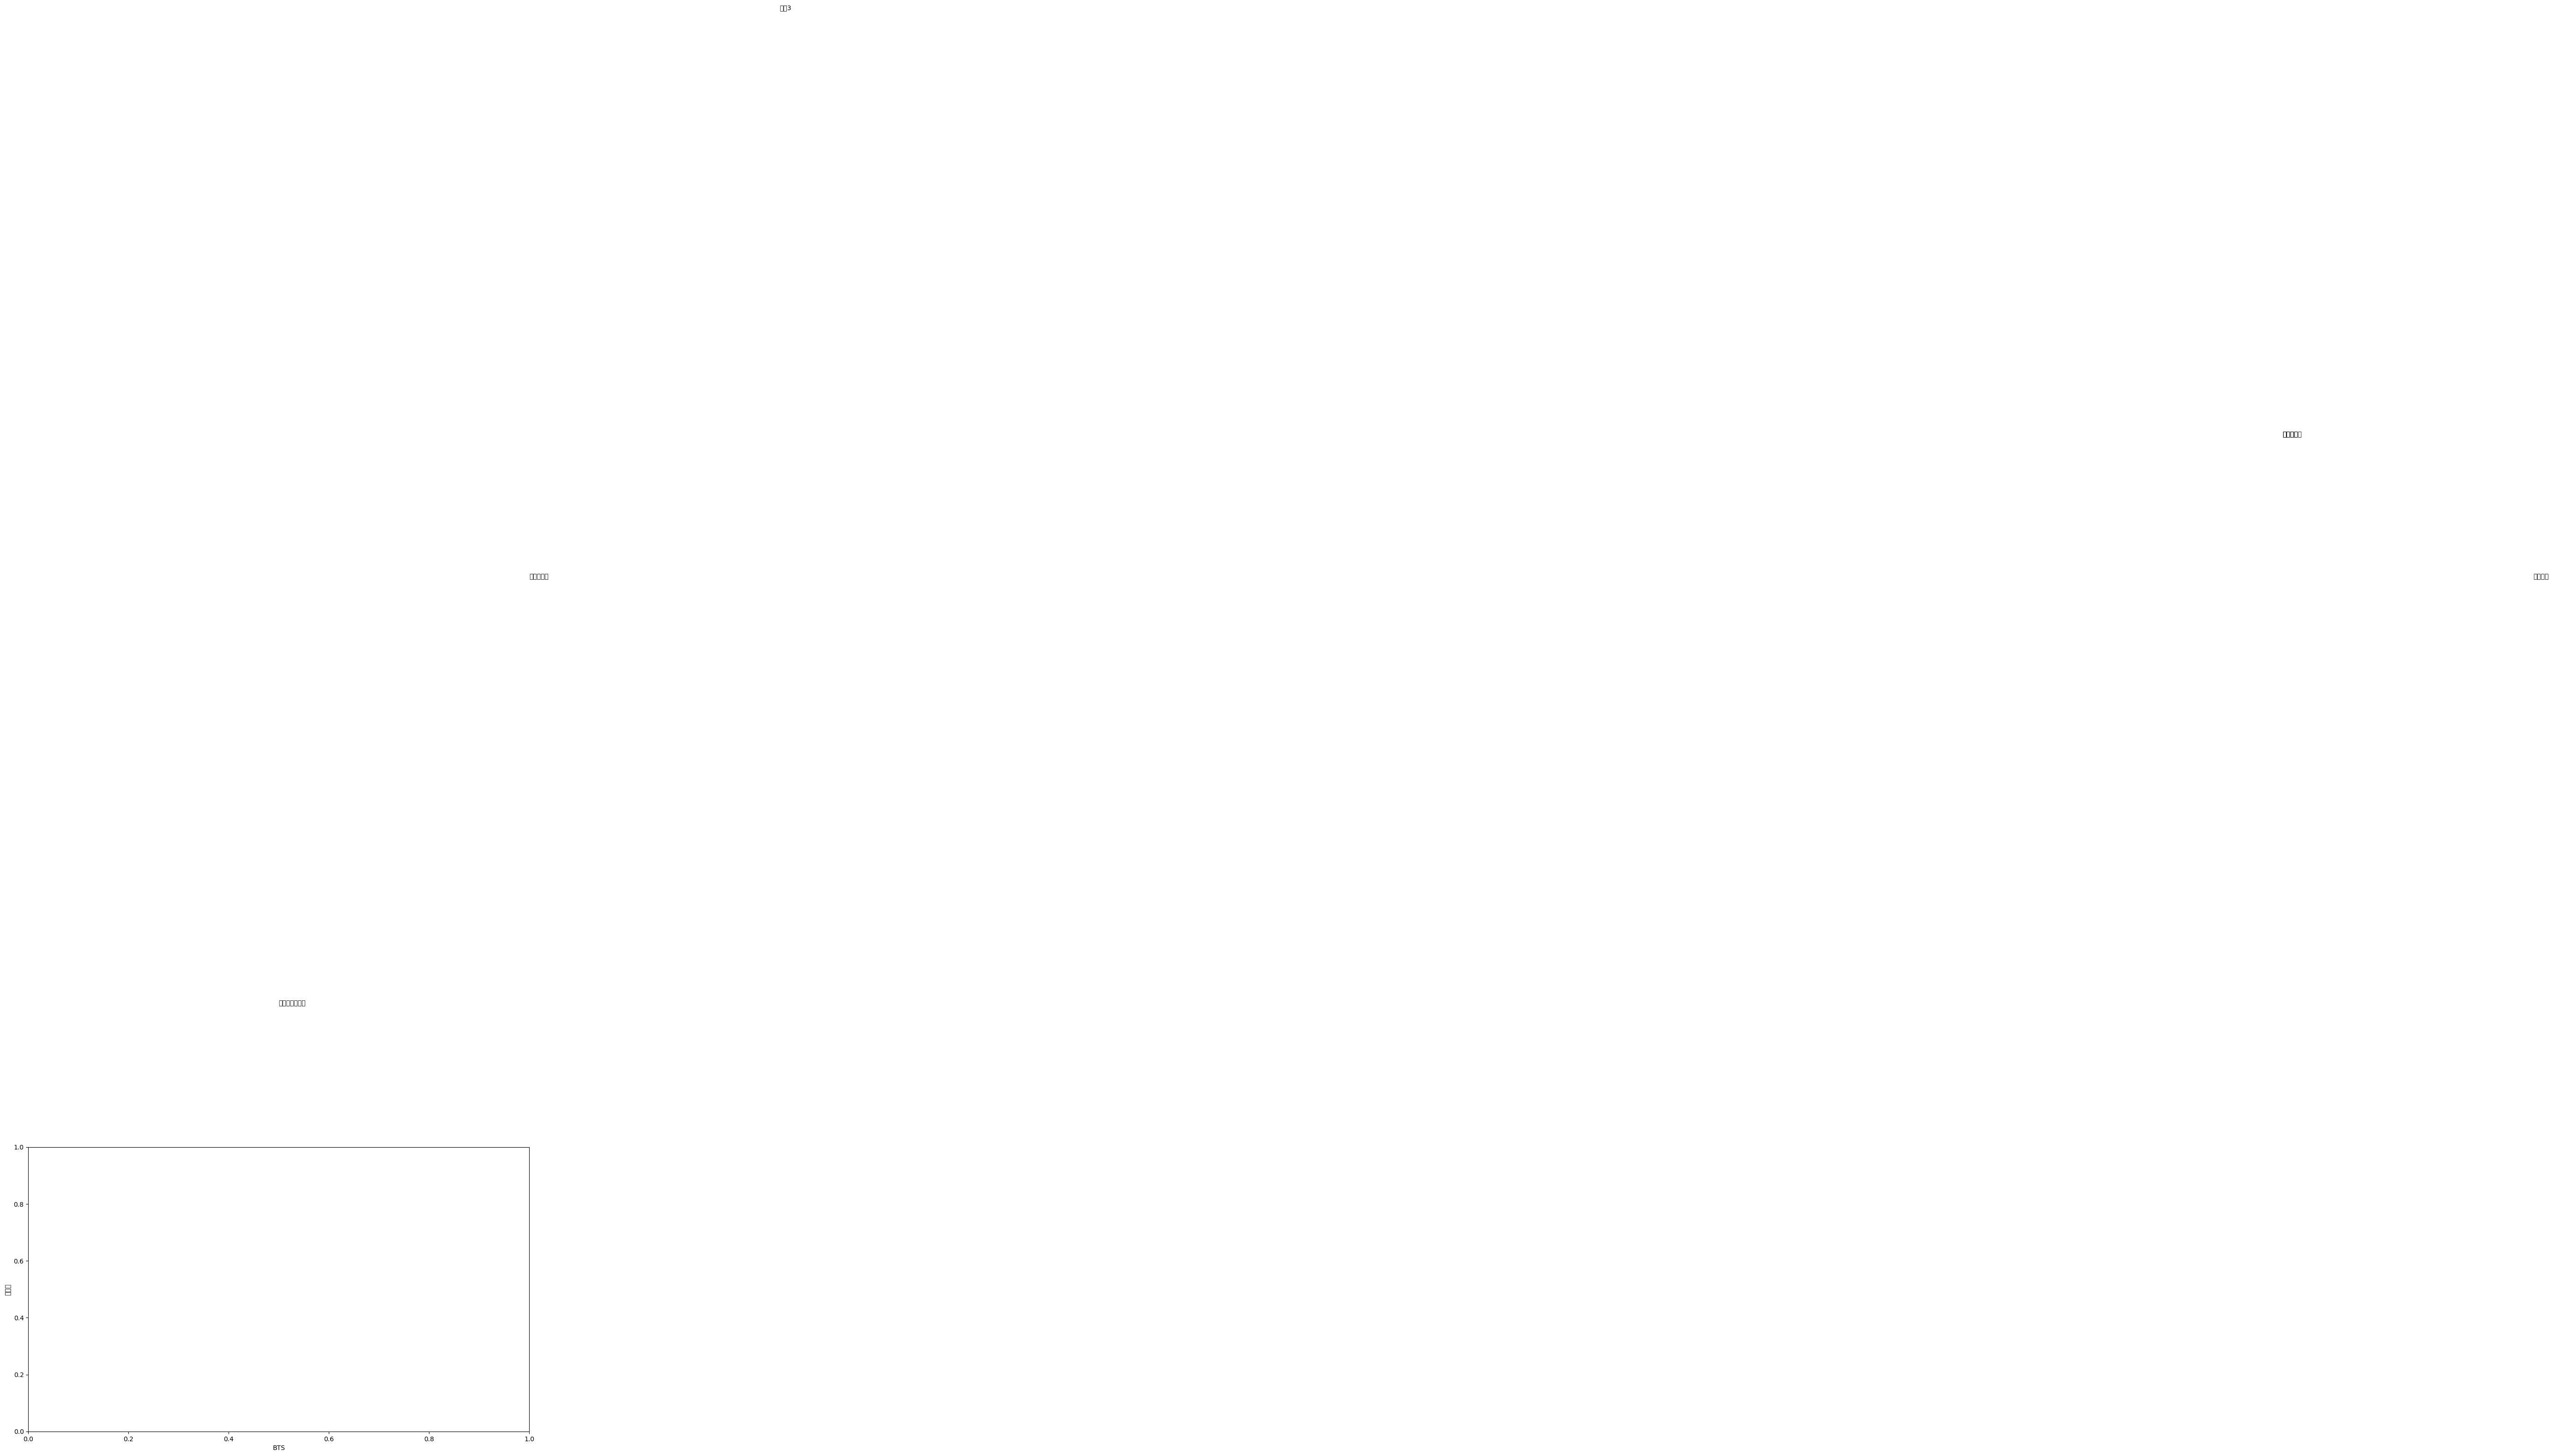

In [37]:
drawGraph(critics, 'BTS', '강감찬')

In [49]:
def sim_pearson(data, name1, name2):
    #상관계수 계산
    xsum=0
    ysum=0
    pwxsum=0
    pwysum=0
    xysum=0
    count=0
    for i in data[name1]:
        if i in data[name2]:
            xsum+=data[name1][i]
            ysum+=data[name2][i]
            pwxsum+=pow(data[name1][i],2)
            pwysum+=pow(data[name2][i],2)
            xysum+=data[name1][i]*data[name2][i]
            count += 1
    return (xysum-((xsum*ysum)/count))/math.sqrt((pwxsum-(pow(xsum,2))/count)*(pwysum-(pow(ysum,2))/count))


In [50]:
print(sim_pearson(critics,'BTS','강감찬'))

0.21693045781865616


In [120]:
def top_match(data, name, n=3, sim_f=sim_pearson):
    #구현
    myList=[]
    for i in data:
        if name!= i:
            myList.append((sim_f(data,name,i),i))
    myList.sort()
    myList.reverse()
    return myList[:n]
top_match(critics,'강감찬',3)

[(0.963795681875635, '이황'),
 (0.39605901719066977, '조용필'),
 (0.38124642583151164, '이이')]

In [53]:
train=pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [54]:
train.shape

(1460, 81)

In [56]:
train_id=train['Id']
test_id=test['Id']


In [58]:
train.drop("Id",axis=1, inplace=True)
test.drop("Id",axis=1, inplace=True)

In [60]:
train.head()
import matplotlib.pyplot as plt
import seaborn as sns

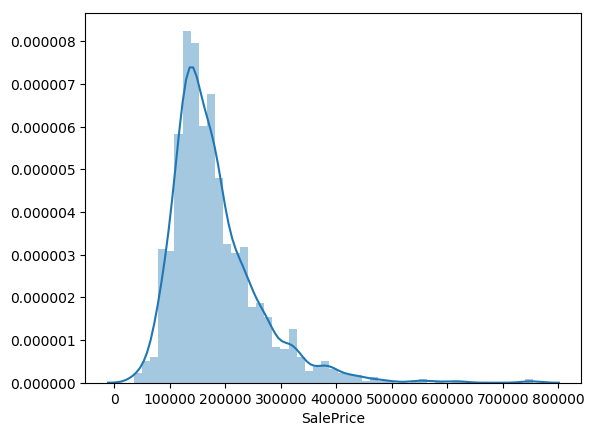

In [62]:
train.columns
sns.distplot(train['SalePrice'])

In [63]:
ntrain=train.shape[0] # (1460,80)
ntest= test.shape[0] # (1459,79)
ytrain=train.SalePrice.values

In [64]:
#트레이닝 + 테스트 => null 처리


In [74]:
allData=pd.concat((train,test)).reset_index(drop=True)
allData.drop(['SalePrice'], axis=1, inplace =True)
allData.head()
allData.shape


C:\Users\Kyujin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2919, 79)

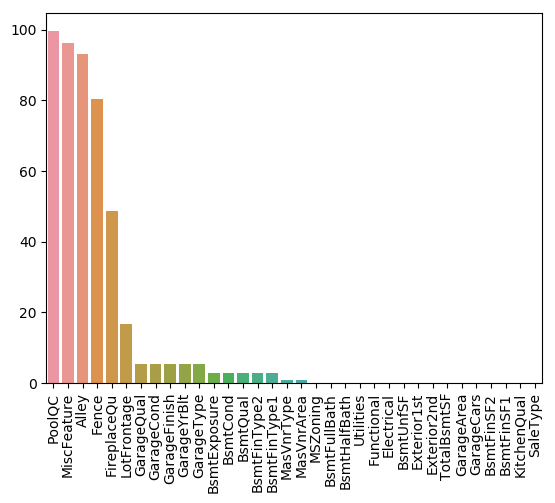

In [114]:
allNa=(allData.isnull().sum()/len(allData))*100
allNa # Na 비율

# 문제
# Na의 비율이 기준으로 내림차순 정렬
# Na비율이 0인 컬럼은 제외

OnlyNa=allNa.loc[allNa!=0]
OnlyNa=OnlyNa.sort_values(ascending=False)
OnlyNa
missingData=pd.DataFrame({'Na Ratio': OnlyNa})
missingData

plt.xticks(rotation='90')
sns.barplot(x=OnlyNa.index, y = OnlyNa)